In [2]:
# The code was removed by Watson Studio for sharing.

<h1 style="color:blue">IBM Data Science Capstone </h1>
    <h3>This Notebook contains the assignment: Segmenting and Clustering Neighborhoods in Toronto.</h3>

 <h4><a href = '#zip'> 1. DataFrame containing Postal Codes extracted from Wiki Page. </a>
   <p><a href = '#merge'> 2. Merge Postal Code DataFrame with Geospatial information </a>
   <p><a href = '#explore'> 3. Explore the Neighborhood </a></h4>

<h3 style="color:red">1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from urllib.request import urlopen
import requests
#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium
from bs4 import BeautifulSoup

     |████████████████████████████████| 93 kB 2.4 MB/s eta 0:00:011


<h3 style="color:red">2. Get Postal Code Data for the City of Toronto

#### <li> Declare the Wiki URL </li>

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

#### <li> Open the URL and Read Contents </li>

In [5]:
html = requests.get(url).text

#### <li> Create an instance of HTML parser Beautiful Soup </li>

In [6]:
soup = BeautifulSoup(html, 'lxml')
soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   List of postal codes of Canada: M - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9cd34b24-65da-474b-8c86-6106c4976c38","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":979555370,"wgRevisionId":979555370,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Co

#### <li> <a name='zip'> Get Access to the Table Element in the Wiki and Convert it to DataFrame </a> </li>

In [7]:
zip_table = soup.find('table',{'class':'wikitable sortable'})
rows = zip_table.findAll('tr')
zip_list = []
flag = ''

for tr in rows:
    th = tr.find_all('th')
    if th != [] and flag == '':
        cols = [str(i.text).replace('\n', '') for i in th]
#        print(cols)
        flag = 'X'
    else:
        td = tr.find_all('td')
        zip_list.append([str(i.text).replace('\n','') for i in td])
zip_df = pd.DataFrame(zip_list, columns=cols)
print('Total records in the ZIP_DF dataframe: ', zip_df.shape[0])
zip_df.head()

Total records in the ZIP_DF dataframe:  180


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


#### <li> Postal Codes mapping to same neighborhood are already rolled up to a single record </li>

In [8]:
zip_df['Postal Code'].value_counts()

M7N    1
M1J    1
M6E    1
M9M    1
M2T    1
      ..
M8A    1
M3K    1
M2W    1
M9X    1
M6R    1
Name: Postal Code, Length: 180, dtype: int64

####  <li> Remove rows that has Borough as 'Not assigned' </li>

In [9]:
print('Number of records having Borough = \'Not assigned\':',zip_df[zip_df['Borough'] == 'Not assigned'].shape[0])

Number of records having Borough = 'Not assigned': 77


In [10]:
# Replace the values 'Not assigned' with NaN
zip_df.replace(to_replace='Not assigned', value=np.nan, inplace=True)

#Now remove the rows containing NaN values
zip_df.dropna(axis=0, inplace=True)
zip_df.reset_index(drop=True, inplace=True)

print('Number of records having Borough = \'Not assigned\':',len(zip_df[zip_df['Borough'] == 'Not assigned']))
print('Number of records in ZIP_DF dataframe:', zip_df.shape[0])

Number of records having Borough = 'Not assigned': 0
Number of records in ZIP_DF dataframe: 103


<h3 style="color:red">3. Upload Geospatial Data for Postal Code (Neighborhood)

In [11]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### <li> <a name='merge'> Merge Zip Code Dataframe with Geospatial Dataframe </a></li>

In [12]:
zip_geo_df = zip_df.merge(geocode_df, how='inner', left_on='Postal Code', right_on='Postal Code')
zip_geo_df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


#### <li> Select only Those Boroughs That Contains 'Toronto' </li>

In [13]:
toronto_df = zip_geo_df[zip_geo_df['Borough'].str.contains('Toronto')]
toronto_df.reset_index(drop=True, inplace=True)
print('Number of Boroughs containing \'Toronto\':', toronto_df.shape[0])
toronto_df

Number of Boroughs containing 'Toronto': 39


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


<h3 style="color:red">4. Get Venue Details from Foursquare

#### <li> Define Foursquare Credentials </li>

In [14]:
# The code was removed by Watson Studio for sharing.

#### <li> Create Function to Get Venues Near the Specified Neighborhood. </li>

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### <li> Get Venues for Each Neighborhood </li>

In [16]:
toronto_venues = getNearbyVenues(
                                     names = toronto_df['Neighbourhood'],
                                     latitudes = toronto_df['Latitude'],
                                     longitudes = toronto_df['Longitude'],
                                 )
toronto_venues.head()

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [17]:
print('Total Number of Venues:', toronto_venues.shape[0])
print('There are {} unique categories.'.format(len(toronto_venues['Venue Category'].unique())))
print(toronto_venues['Venue Category'].unique())
toronto_venues.groupby('Neighborhood').count()

Total Number of Venues: 1624
There are 237 unique categories.
['Bakery' 'Coffee Shop' 'Distribution Center' 'Spa' 'Restaurant' 'Pub'
 'Park' 'Breakfast Spot' 'Gym / Fitness Center' 'Historic Site'
 'Farmers Market' 'Chocolate Shop' 'Dessert Shop' 'Performing Arts Venue'
 'Theater' 'French Restaurant' 'Mexican Restaurant' 'Yoga Studio' 'Café'
 'Event Space' 'Shoe Store' 'Art Gallery' 'Electronics Store' 'Brewery'
 'Bank' 'Beer Store' 'Hotel' 'Antique Shop' 'Italian Restaurant'
 'Portuguese Restaurant' 'Beer Bar' 'Creperie' 'Sushi Restaurant'
 'Hobby Shop' 'Diner' 'Fried Chicken Joint' 'Chinese Restaurant'
 'Smoothie Shop' 'Sandwich Place' 'Gym' 'Bar' 'College Auditorium'
 'College Cafeteria' 'Music Venue' 'Clothing Store' 'Comic Shop' 'Plaza'
 'Burrito Place' 'Pizza Place' 'Ramen Restaurant' 'Thai Restaurant'
 'Burger Joint' 'Shopping Mall' 'New American Restaurant' 'Bookstore'
 'Gastropub' 'Tanning Salon' 'Japanese Restaurant' 'Fast Food Restaurant'
 'Steakhouse' 'Movie Theater' 'Colle

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,55,55,55,55,55,55
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,68,68,68,68,68,68
Christie,16,16,16,16,16,16
Church and Wellesley,75,75,75,75,75,75
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,33,33,33,33,33,33


<h3 style="color:red"> <a name='explore'> 5. Explore the Neighborhood  </a></h3>

In [18]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
# fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
neigh_idx = toronto_onehot.columns.get_loc('Neighborhood')
fixed_columns = [toronto_onehot.columns[neigh_idx]] + list(toronto_onehot.columns[:neigh_idx]) + list(toronto_onehot.columns[(neigh_idx+1):])
toronto_onehot = toronto_onehot[fixed_columns]

print(fixed_columns)
print('Dimensions of toronto_onehot:', toronto_onehot.shape)
toronto_onehot.head()

['Neighborhood', 'Afghan Restaurant', 'Airport', 'Airport Food Court', 'Airport Gate', 'Airport Lounge', 'Airport Service', 'Airport Terminal', 'American Restaurant', 'Antique Shop', 'Aquarium', 'Art Gallery', 'Art Museum', 'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports', 'Auto Workshop', 'BBQ Joint', 'Baby Store', 'Bagel Shop', 'Bakery', 'Bank', 'Bar', 'Baseball Stadium', 'Basketball Stadium', 'Beach', 'Bed & Breakfast', 'Beer Bar', 'Beer Store', 'Belgian Restaurant', 'Bistro', 'Boat or Ferry', 'Bookstore', 'Boutique', 'Brazilian Restaurant', 'Breakfast Spot', 'Brewery', 'Bubble Tea Shop', 'Building', 'Burger Joint', 'Burrito Place', 'Bus Line', 'Butcher', 'Café', 'Cajun / Creole Restaurant', 'Camera Store', 'Candy Store', 'Caribbean Restaurant', 'Cheese Shop', 'Chinese Restaurant', 'Chocolate Shop', 'Church', 'Climbing Gym', 'Clothing Store', 'Cocktail Bar', 'Coffee Shop', 'College Arts Building', 'College Auditorium', 'College Cafeteria', 'College Gym', 'College Rec 

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### <li> Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category </li>

In [19]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.018182,0.000000,0.000000,0.000000,0.00,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0625,0.0625,0.0625,0.125,0.125,0.0625,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,Central Bay Street,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.014706,0.000000,0.000000,0.014706,0.00,0.014706
5,Christie,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,Church and Wellesley,0.013333,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.013333,0.000000,...,0.013333,0.000000,0.000000,0.00,0.000000,0.000000,0.013333,0.000000,0.00,0.026667
7,"Commerce Court, Victoria Hotel",0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.030000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.00,0.000000
8,Davisville,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.030303,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,Davisville North,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000


In [20]:
toronto_grouped.shape

(39, 237)

#### <li> Create a Function to Sort Venues in Descending Order </li>

In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### <li> Create Dataframe to Show Top 10 Venues for Each Neighborhood </li>

In [22]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Bakery,Farmers Market,Beer Bar,Restaurant,Cheese Shop,Bistro,Concert Hall
1,"Brockton, Parkdale Village, Exhibition Place",Café,Nightclub,Coffee Shop,Breakfast Spot,Bakery,Convenience Store,Performing Arts Venue,Pet Store,Climbing Gym,Restaurant
2,"Business reply mail Processing Centre, South C...",Pizza Place,Garden Center,Farmers Market,Butcher,Brewery,Burrito Place,Recording Studio,Garden,Auto Workshop,Fast Food Restaurant
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Boutique,Plane,Airport,Airport Food Court,Airport Gate,Airport Terminal,Bar,Harbor / Marina
4,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Salad Place,Bubble Tea Shop,Department Store,Burger Joint,Japanese Restaurant,Thai Restaurant


<h3 style="color:red">6. Clustering Using K-Means

#### <li> Find out the correct K value </li>

3.2978900795825696
2.616596300634815
2.1193328495450476
1.8049501837643371
1.5568328495450483
1.4318328495450483
1.238977961542115
1.1411549952689735
1.0622265273687725
0.9553603272045723


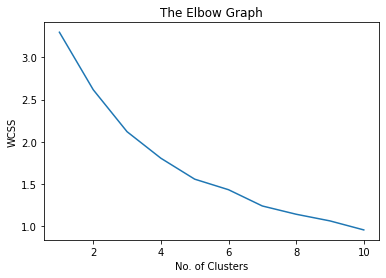

In [23]:
from sklearn.cluster import KMeans
wcss = []

toronto_clusters = toronto_grouped.drop('Neighborhood',1)

# Select clusters ranging from 1-10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(toronto_clusters)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)
# End of for loop and start of plotting
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

#### <li> Based on the Elbow Graph Above, Let's Select K=5</li>

In [24]:
# set number of clusters
kclusters = 5

#toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#### <li> Create a New Dataframe that contains cluster label and top venues in Neighborhood </li>

In [25]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
zip_geo_df.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)
toronto_merged = zip_geo_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.merge(neighborhoods_venues_sorted, how='inner', left_on='Neighborhood', right_on='Neighborhood')

toronto_merged # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Shoe Store,Brewery,Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Yoga Studio,Diner,Restaurant,Portuguese Restaurant,Park,Music Venue,Mexican Restaurant,Italian Restaurant,Hobby Shop
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Café,Bubble Tea Shop,Japanese Restaurant,Cosmetics Shop,Lingerie Store,Hotel,Bookstore,Pizza Place
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Cocktail Bar,Restaurant,Beer Bar,Gastropub,American Restaurant,Farmers Market,Hotel,Japanese Restaurant
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Pub,Trail,Yoga Studio,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Donut Shop
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Seafood Restaurant,Bakery,Farmers Market,Beer Bar,Restaurant,Cheese Shop,Bistro,Concert Hall
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Salad Place,Bubble Tea Shop,Department Store,Burger Joint,Japanese Restaurant,Thai Restaurant
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0,Grocery Store,Café,Park,Restaurant,Candy Store,Athletics & Sports,Italian Restaurant,Baby Store,Coffee Shop,Nightclub
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,0,Coffee Shop,Café,Gym,Restaurant,Hotel,Bar,Thai Restaurant,Clothing Store,Office,Sushi Restaurant
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,0,Bakery,Pharmacy,Supermarket,Café,Grocery Store,Brewery,Park,Bank,Music Venue,Middle Eastern Restaurant


#### <li> Visualize the Clusters </li>

In [26]:
#Co-ordinates for the city of Toronto
latitude = 43.6532
longitude = -79.3832

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### <li> Cluster 1 </li>

In [34]:
toronto_merged.loc[toronto_merged['Cluster Labels']==0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Regent Park, Harbourfront",0,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Shoe Store,Brewery,Restaurant
1,"Queen's Park, Ontario Provincial Government",0,Coffee Shop,Yoga Studio,Diner,Restaurant,Portuguese Restaurant,Park,Music Venue,Mexican Restaurant,Italian Restaurant,Hobby Shop
2,"Garden District, Ryerson",0,Clothing Store,Coffee Shop,Café,Bubble Tea Shop,Japanese Restaurant,Cosmetics Shop,Lingerie Store,Hotel,Bookstore,Pizza Place
3,St. James Town,0,Coffee Shop,Café,Cocktail Bar,Restaurant,Beer Bar,Gastropub,American Restaurant,Farmers Market,Hotel,Japanese Restaurant
4,The Beaches,0,Health Food Store,Pub,Trail,Yoga Studio,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Donut Shop
5,Berczy Park,0,Coffee Shop,Cocktail Bar,Seafood Restaurant,Bakery,Farmers Market,Beer Bar,Restaurant,Cheese Shop,Bistro,Concert Hall
6,Central Bay Street,0,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Salad Place,Bubble Tea Shop,Department Store,Burger Joint,Japanese Restaurant,Thai Restaurant
7,Christie,0,Grocery Store,Café,Park,Restaurant,Candy Store,Athletics & Sports,Italian Restaurant,Baby Store,Coffee Shop,Nightclub
8,"Richmond, Adelaide, King",0,Coffee Shop,Café,Gym,Restaurant,Hotel,Bar,Thai Restaurant,Clothing Store,Office,Sushi Restaurant
9,"Dufferin, Dovercourt Village",0,Bakery,Pharmacy,Supermarket,Café,Grocery Store,Brewery,Park,Bank,Music Venue,Middle Eastern Restaurant


#### <li> Cluster 2 </li>

In [35]:
toronto_merged.loc[toronto_merged['Cluster Labels']==1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,"Moore Park, Summerhill East",1,Playground,Trail,Yoga Studio,Department Store,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


#### <li> Cluster 3 </li>

In [36]:
toronto_merged.loc[toronto_merged['Cluster Labels']==2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Lawrence Park,2,Park,Bus Line,Swim School,Dim Sum Restaurant,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


#### <li> Cluster 4 </li>

In [37]:
toronto_merged.loc[toronto_merged['Cluster Labels']==3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,"Forest Hill North & West, Forest Hill Road Park",3,Park,Jewelry Store,Trail,Sushi Restaurant,Yoga Studio,Dessert Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
33,Rosedale,3,Park,Playground,Trail,Department Store,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


#### <li> Cluster 5 </li>

In [38]:
toronto_merged.loc[toronto_merged['Cluster Labels']==4, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Roselawn,4,Music Venue,Garden,Yoga Studio,Department Store,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
